In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
results_path = Path('../../../results/all/experiment_results.csv')
df = pd.read_csv(results_path)

# Filter for synthetic datasets
synthetic_datasets = ['A', 'B', 'C', 'D']
df_synthetic = df[df['dataset_id'].isin(synthetic_datasets)]

print(f"Loaded {len(df_synthetic)} synthetic experiments")
print(f"Methods: {df_synthetic['model_name'].unique()}")
print(f"Datasets: {df_synthetic['dataset_id'].unique()}")


Loaded 400 synthetic experiments
Methods: ['lasso' 'lassonet' 'nimo' 'random_forest' 'neural_net']
Datasets: ['A' 'B' 'C' 'D']


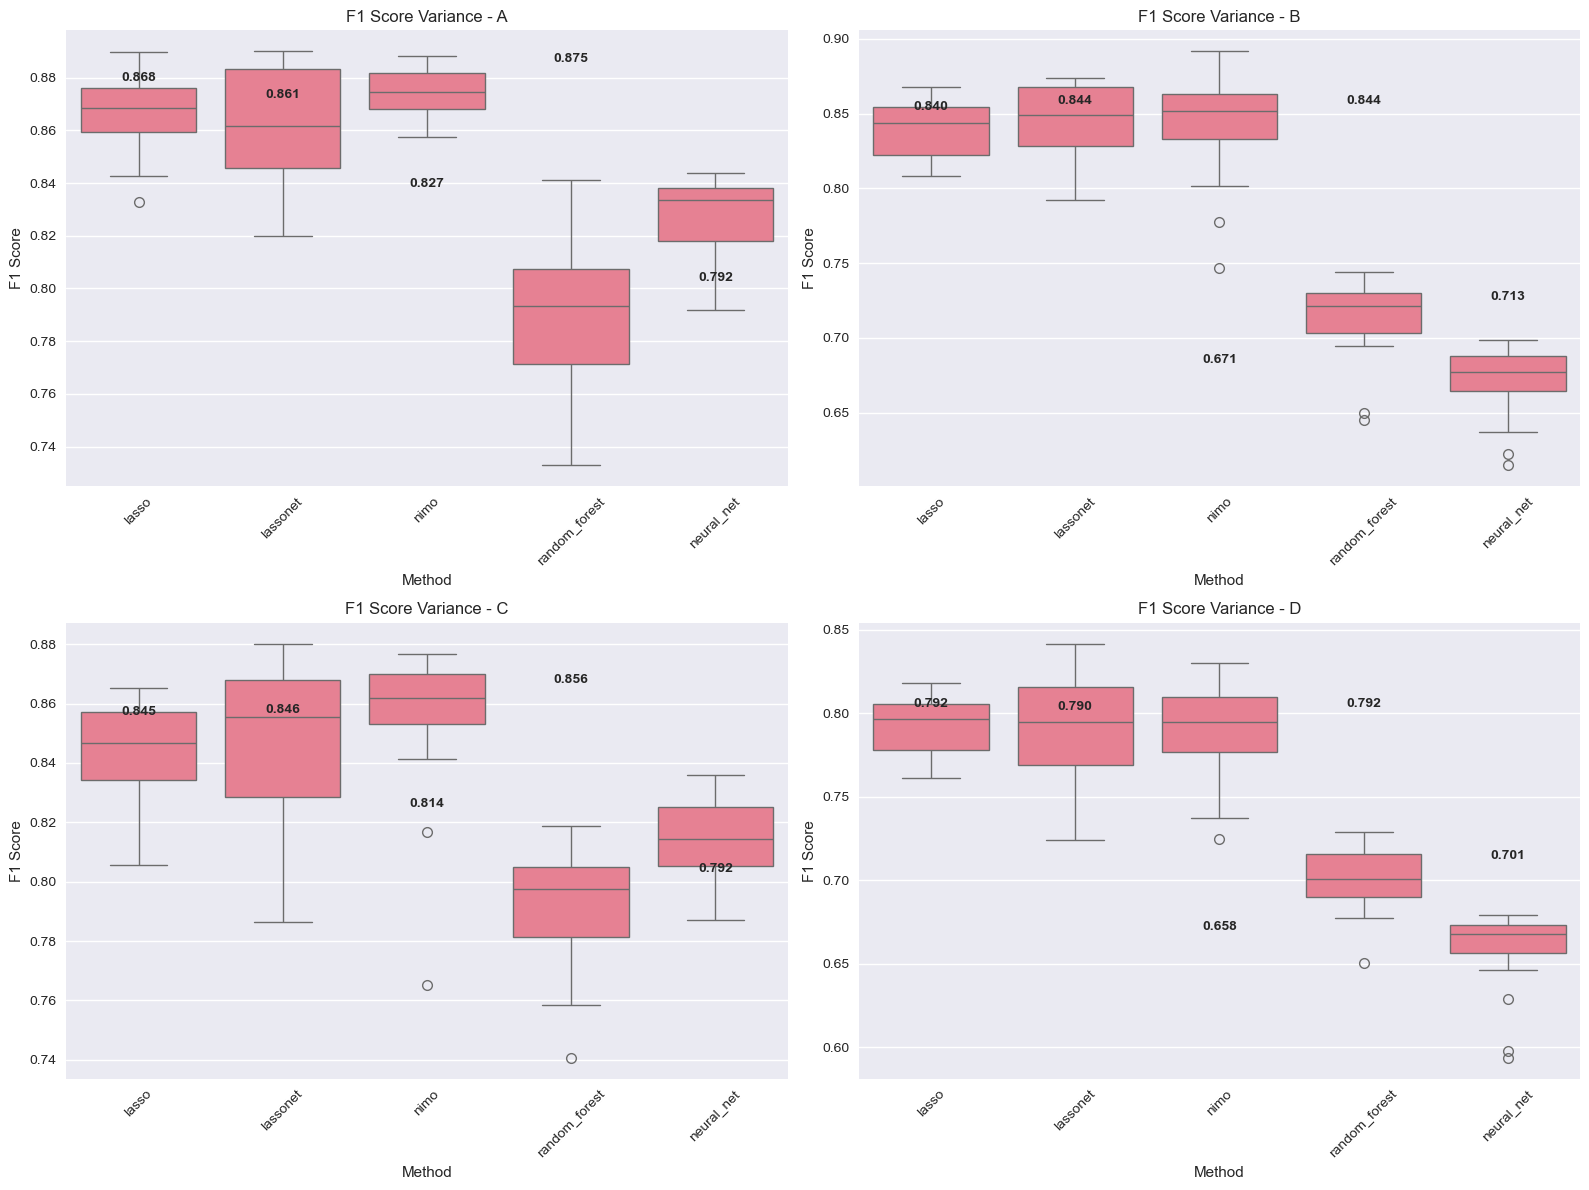

\n=== PERFORMANCE VARIANCE ANALYSIS ===
\nA:
                 mean     std     min     max
model_name                                   
lasso          0.8676  0.0150  0.8329  0.8898
lassonet       0.8613  0.0223  0.8197  0.8901
neural_net     0.8275  0.0144  0.7919  0.8439
nimo           0.8749  0.0097  0.8573  0.8884
random_forest  0.7917  0.0277  0.7329  0.8411
\nB:
                 mean     std     min     max
model_name                                   
lasso          0.8401  0.0191  0.8081  0.8679
lassonet       0.8441  0.0251  0.7920  0.8738
neural_net     0.6714  0.0235  0.6147  0.6985
nimo           0.8442  0.0354  0.7469  0.8919
random_forest  0.7130  0.0268  0.6448  0.7437
\nC:
                 mean     std     min     max
model_name                                   
lasso          0.8451  0.0155  0.8057  0.8651
lassonet       0.8458  0.0280  0.7865  0.8802
neural_net     0.8140  0.0137  0.7870  0.8360
nimo           0.8559  0.0257  0.7653  0.8768
random_forest  0.7924  0.

In [6]:
# 1. Performance Variance over Iterations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, dataset in enumerate(synthetic_datasets):
    dataset_data = df_synthetic[df_synthetic['dataset_id'] == dataset]
    
    # Create boxplot for F1 scores by method
    sns.boxplot(data=dataset_data, x='model_name', y='f1', ax=axes[i])
    axes[i].set_title(f'F1 Score Variance - {dataset}')
    axes[i].set_xlabel('Method')
    axes[i].set_ylabel('F1 Score')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add mean values as text
    means = dataset_data.groupby('model_name')['f1'].mean()
    for j, (method, mean) in enumerate(means.items()):
        axes[i].text(j, mean + 0.01, f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate variance statistics
print("\\n=== PERFORMANCE VARIANCE ANALYSIS ===")
for dataset in synthetic_datasets:
    dataset_data = df_synthetic[df_synthetic['dataset_id'] == dataset]
    print(f"\\n{dataset}:")
    variance_stats = dataset_data.groupby('model_name')['f1'].agg(['mean', 'std', 'min', 'max']).round(4)
    print(variance_stats)


<Figure size 1500x1000 with 0 Axes>

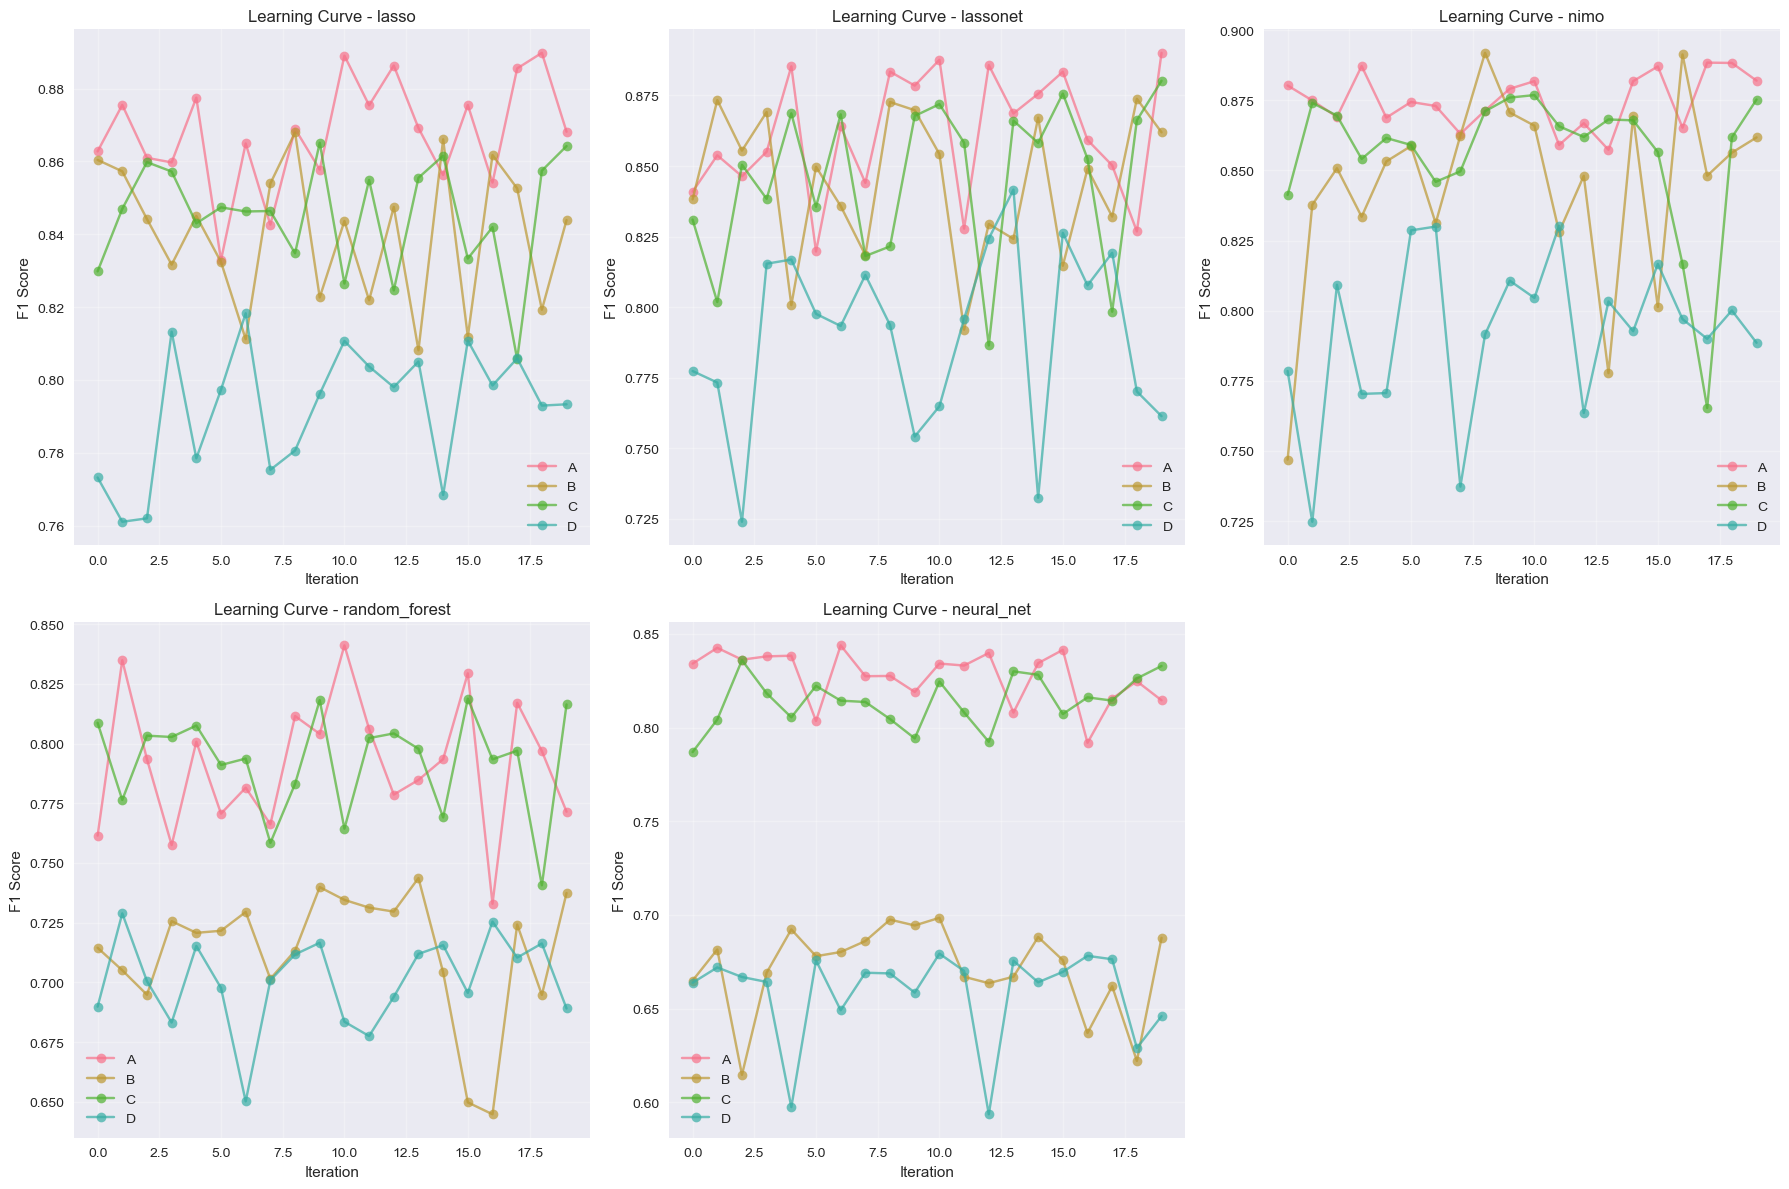

In [7]:
# 2. Learning Curves (Performance vs Iterations)
plt.figure(figsize=(15, 10))

# Create subplots for each method
methods = df_synthetic['model_name'].unique()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, method in enumerate(methods):
    if i < len(axes):
        method_data = df_synthetic[df_synthetic['model_name'] == method]
        
        # Plot F1 score over iterations for each dataset
        for dataset in synthetic_datasets:
            dataset_method_data = method_data[method_data['dataset_id'] == dataset]
            if len(dataset_method_data) > 0:
                # Sort by iteration to get proper learning curve
                dataset_method_data = dataset_method_data.sort_values('iteration')
                axes[i].plot(dataset_method_data['iteration'], dataset_method_data['f1'], 
                           marker='o', label=dataset, alpha=0.7)
        
        axes[i].set_title(f'Learning Curve - {method}')
        axes[i].set_xlabel('Iteration')
        axes[i].set_ylabel('F1 Score')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(methods), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()
